In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### notice that Hipertension has a typo and No-show has a dash instead of _


In [3]:
#cheching for the shape of df
df.shape

(110527, 14)

In [4]:
#cheching for missing values and general look of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### we have a wrong data type is ScheduledDay and AppointmentDay  

In [5]:
#cheching for the duplicated values in df
df.duplicated().sum()

0

### No duplicated values

In [6]:
#cheching for the actual number of IDs in df
df['PatientId'].nunique()

62299

In [7]:
#cheching for the number of duplicated rows in df
df['PatientId'].duplicated().sum()

48228

In [8]:
#cheching for the duplicated IDs with Punctuality status in df
df.duplicated(['PatientId','No-show']).sum()

38710

In [9]:
#cheching for missing values 
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

### No missing values 

In [10]:
#general look using describe 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### general look appears an outlier is the column Age (min -1)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [12]:
#adjusting the typo and checking if the problem solved 
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# adjusting the data type 
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

In [14]:
#checking if the problem solved 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [15]:
#finding the wrong data row
wrong_row=df.query('Age== "-1"')
wrong_row

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
#removing the wrong data row
df.drop(index=99832,inplace=True)

In [17]:
#checking if the problem solved 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### now -1 is removed 

In [18]:
#removing all duplicated rows
df.drop_duplicates(['PatientId','No_show'],inplace = True)
df.shape

(71816, 14)

### now we are ready to analize our data

### overview for all colunms

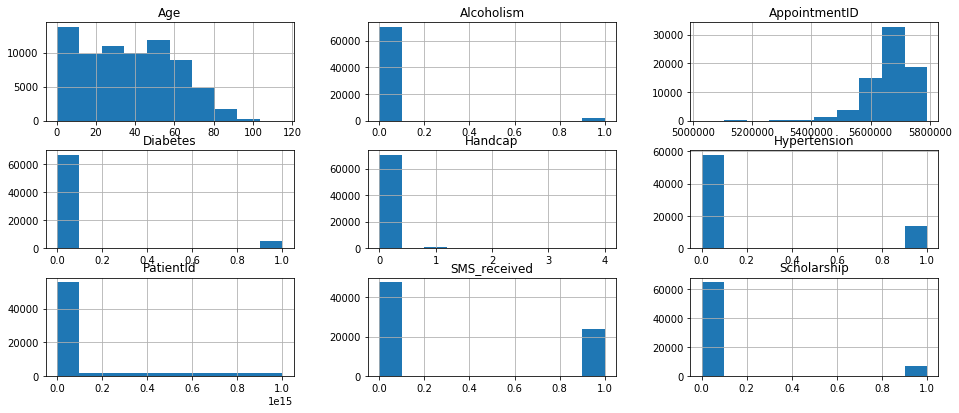

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,6.5));

In [20]:
No_show = df.No_show=='Yes'
show = df.No_show=='No'
df[No_show].count(),df[show].count()

(PatientId         17663
 AppointmentID     17663
 Gender            17663
 ScheduledDay      17663
 AppointmentDay    17663
 Age               17663
 Neighbourhood     17663
 Scholarship       17663
 Hypertension      17663
 Diabetes          17663
 Alcoholism        17663
 Handcap           17663
 SMS_received      17663
 No_show           17663
 dtype: int64, PatientId         54153
 AppointmentID     54153
 Gender            54153
 ScheduledDay      54153
 AppointmentDay    54153
 Age               54153
 Neighbourhood     54153
 Scholarship       54153
 Hypertension      54153
 Diabetes          54153
 Alcoholism        54153
 Handcap           54153
 SMS_received      54153
 No_show           54153
 dtype: int64)

### now we find that 54153 patients kept on time and 17663 patients didn't 
### so let's ask the most important question

### What factors are important for us to know in order to predict if a patient will
### show up for their scheduled appointment?

In [21]:
#creating function to place axis's titles and also the main title
def label(x,y,t):
    """
    Args:
    x(srt):= x-axis title
    y(srt):= y-axis title
    t(srt):= main title 
    Returns:
    None 
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()


## what is the relationthip between age and Punctuality?

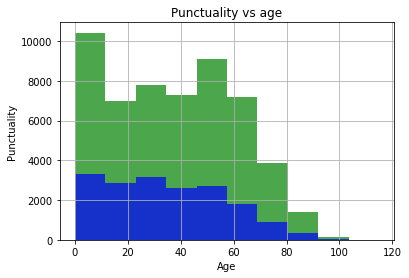

In [22]:
#what is the relationthip between age and Punctuality
def Punctuality(df,col_name,Yes,No):#adjusting
    df[col_name][show].hist(alpha=.7,bins=10,color='green',label='show')
    df[col_name][No_show].hist(alpha=.7,bins=10,color='blue',label='No_show')
    label('Age','Punctuality','Punctuality vs age')
Punctuality(df,'Age',show,No_show)

### here we can see that Patients from age 0 to 10 (kids) are the most showing on time then the teenagers are less showing than kids and old Patients keeps on time more than teens and less than kids who certainly have parents to go with finally the older Patients (above 58 years old) are less showing which means that age is definitely an important for us to know in order to predict if a patient will show up for their scheduled appointment

### what is the relationthip between having Diabetes & Hypertension and Punctuality

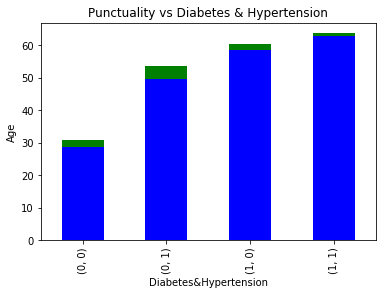

In [23]:
#what is the relationthip between having Diabetes & Hypertension and Punctuality 
def Punctuality2(df,col_name1,col_name2,Yes,No):#adjusting

    df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='green',label='show')
    df[No_show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='No_show')
    label("Diabetes&Hypertension","Age","Punctuality vs Diabetes & Hypertension")
Punctuality2(df,'Hypertension','Diabetes',show,No_show)

In [24]:
# geting the mean of show and no show 
df[No_show].mean(),df[show].mean()

(PatientId        1.460285e+14
 AppointmentID    5.648098e+06
 Age              3.437627e+01
 Scholarship      1.084187e-01
 Hypertension     1.709223e-01
 Diabetes         6.510785e-02
 Alcoholism       2.944007e-02
 Handcap          1.777727e-02
 SMS_received     4.530940e-01
 dtype: float64, PatientId        1.468194e+14
 AppointmentID    5.672494e+06
 Age              3.722917e+01
 Scholarship      9.133381e-02
 Hypertension     2.029435e-01
 Diabetes         7.286762e-02
 Alcoholism       2.359980e-02
 Handcap          2.090374e-02
 SMS_received     2.972319e-01
 dtype: float64)

### what is the relationthip between having Diabetes & Hypertension and Punctuality as a numberes ?


In [25]:
#what is the relationthip between having Diabetes & Hypertension and Punctuality as a numberes 
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[No_show].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

### now we find that Diabetes & Hypertension aren't important for us to know in order to predict if a patient will show up for their scheduled appointment

### what is the relationthip between Scholarship and Punctuality ?

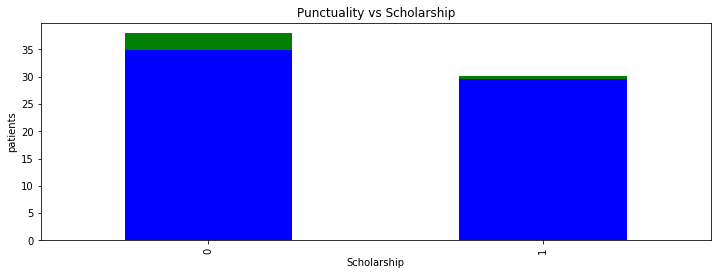

In [26]:
#what is the relationthip between Scholarship and Punctuality 
plt.figure(figsize=[12,4])#adjusting
df[show].groupby('Scholarship').Age.mean().plot(kind='bar',color='green',label='show')
df[No_show].groupby('Scholarship').Age.mean().plot(kind='bar',color='blue',label='No_show')
label("Scholarship","patients","Punctuality vs Scholarship")

### now we find that Scholarship isn't important for us to know in order to predict if a patient will show up for their scheduled appointment

## what is the relationthip between SMS_received and Punctuality

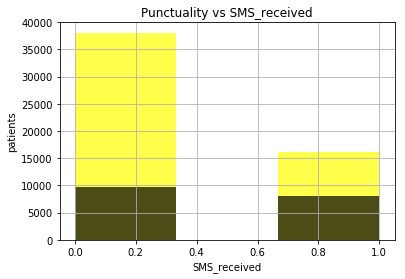

In [27]:
def Punctuality3(df,col_name,Yes,No):#adjusting
    df[col_name][show].hist(alpha=.7,bins=3,color='yellow',label='show')
    df[col_name][No_show].hist(alpha=.7,bins=3,color='black',label='No_show')
    label ('SMS_received','patients','Punctuality vs SMS_received')
Punctuality3(df,'SMS_received',show,No_show)

### now we find that receiving SMS isn't important for us to know in order to predict if a patient will show up for their scheduled appointment but number of attending patients with recieving SMS are less than patients without recieving SMS so we need to adjust our SMS texts 

### what is the relationthip between Neighbourhood and Punctuality?


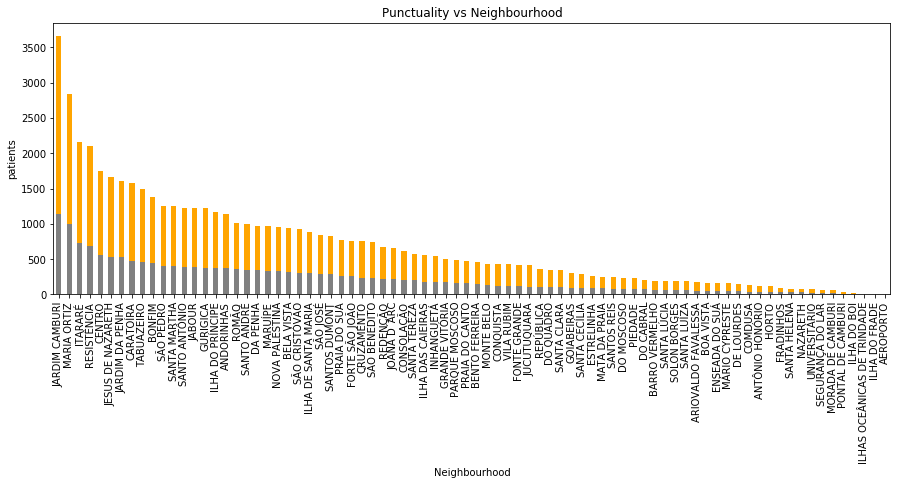

In [28]:
#what is the relationthip between Neighbourhood and Punctuality
plt.figure(figsize=[15,5])#adjusting
df.Neighbourhood[show].value_counts().plot(kind='bar',color='orange',label='show')
df.Neighbourhood[No_show].value_counts().plot(kind='bar',color='gray',label='No_show')
label("Neighbourhood","patients","Punctuality vs Neighbourhood")

### Neighbourhood is a strong factor which affects the Punctuality

### what is the relationthip between Neighbourhood & recieving SMS and Punctuality?

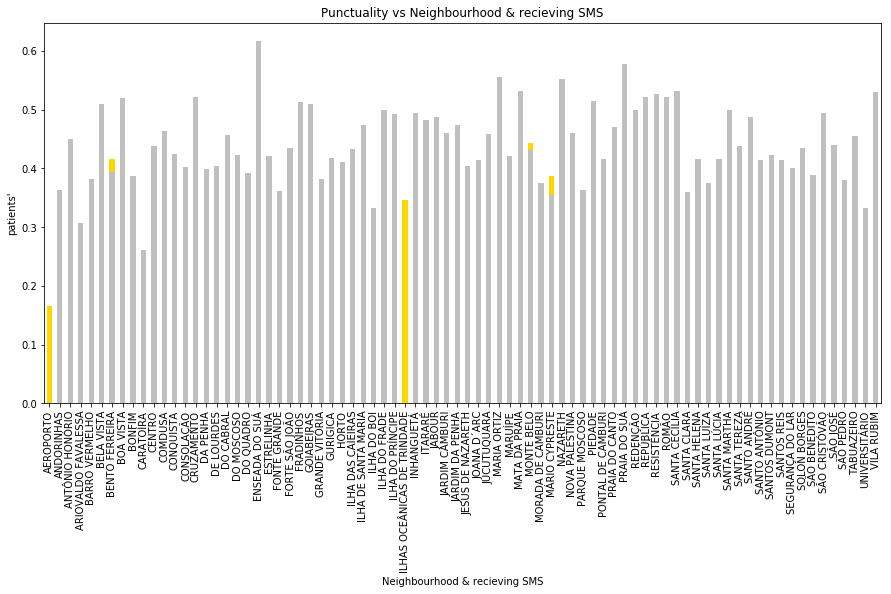

In [29]:
#what is the relationthip between Neighbourhood & recieving SMS and Punctuality
plt.figure(figsize=[15,7])#adjusting
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='gold',label='show')
df[No_show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='silver',label='No_show')
label("Neighbourhood & recieving SMS","patients'","Punctuality vs Neighbourhood & recieving SMS")

### we notice that SMS has a slight affect (only 5 Neighbourhoods) and the most affected Neighbourhood is ilhas oceanicas de trindade

### what is the relationthip between Neighbourhood & age and Punctuality?

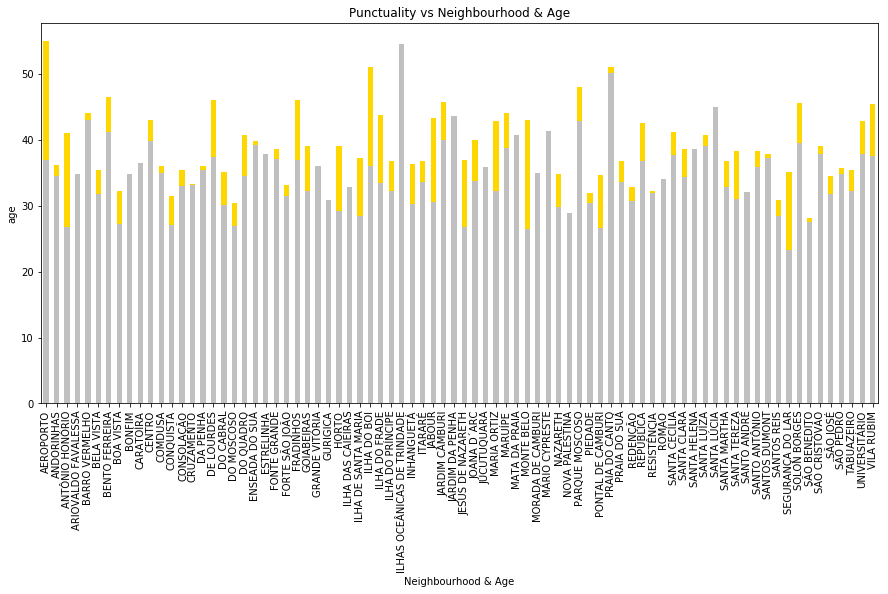

In [30]:
#what is the relationthip between Neighbourhood & age and Punctuality
plt.figure(figsize=[15,7])#adjusting
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='gold',label='show')
df[No_show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='silver',label='No_show')
label("Neighbourhood & Age","age","Punctuality vs Neighbourhood & Age")

### we notice that  the mean age  is different from Neighbourhood to other and  has a greater affect than SMS (almost all Neighbourhoods) 

### what is the relationthip between gender and Punctuality?

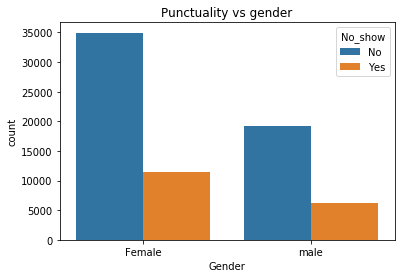

In [31]:
#what is the relationthip between gender and Punctuality 
a=sns.countplot(x=df.Gender,hue = df.No_show, data=df)
a.set_title('Punctuality vs gender')
x_tick_labels=['Female','male']
a.set_xticklabels(x_tick_labels)
plt.show()

### now we find that gender isn't important for us to know in order to predict if a patient will show up for their scheduled appointment

## Conclusions 
### First we imported the required libraries and loaded data , check for cleanless and then clean dataset for analyzing , After gathering the data from csv file we explored the first few rows  of the data set to see its general properities then we appeared the dimensions of our data , then we checked if there were any duplicated pointments , then explored to check if there was any duplicated patients IDs and removed them , then we turned to our data informations like data types and if there was any missing data to handle , then we saw some figures about our data like (min , max , mean ) , and finally we cleaned our data by correcting the column names and dropping the unnecessary data .
### Secondly​ we started analyzing data to find that Neighbourhood has a great affect on attendance or not , also numbers of showing patients without recieving SMS is greater than showing patients with recieving sms so we need to adjust our SMS texts 




## limitations we can't find any clear relationship between patients attendance and many factors like disabilities(Handcap column)

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0